In [1]:
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from scipy.linalg import eigh
from sklearn import manifold
from scipy.sparse import diags, linalg


In [16]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

N = X.shape[0]

**Etape 1: Construire un graphe des voisins, pour chaque point 𝑋𝑖 , déterminer ses kPPV**
1. chaque nœud est connecté à ses kPPV
2. les arrêtes de poids non-nuls prennent comme valeurs la distance euclidienne entre les 2 nœuds
3. symétriser le graphe pour obtenir la matrice d’adjacence W

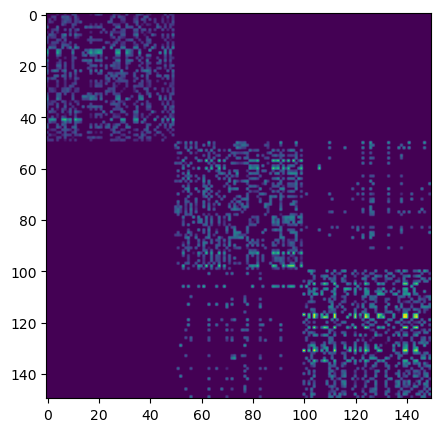

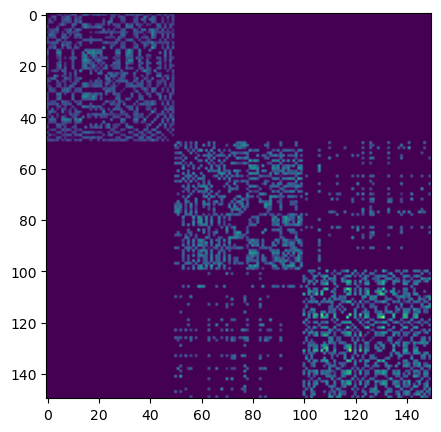

In [36]:
n_neighbors = 20 # Aumentar o valor de K nao impacta muito o resultado. A distribuicao segue com mesma geometria, mas um pouco mais acentuado
kng = kneighbors_graph(X, n_neighbors,mode='distance')
kng.nnz

# simetrizar (pode aumentar o numero de vizinhos para k+(k-1))
W = 0.5*(kng+kng.T)  

plt.figure(figsize=(5,5))
plt.imshow(kng.todense())
# plt.imshow(kng.todense()[:50,:50])


plt.figure(figsize=(5,5))
plt.imshow(W.todense())

**Etape 2: Calculer la matrice des degrés D**

In [37]:
# matriz de degree ou matrice de adjacences (soma dos valores das colunas)
D = diags(np.asarray(W.sum(axis=0)).flatten())

**Etape 3: Calculer la matrice Laplacienne**

**Etape 4: Déterminer les plus faibles valeurs propres non nulles de la matrice Laplacienne**

In [38]:
Laplacian = D-W

[yl, YL] = linalg.eigsh(Laplacian, n_neighbors, which='SM')
print("Val propres Laplacian non normalisé =  ", yl)

# percebe-se dois valpropres "nulos" 

Val propres Laplacian non normalisé =   [-5.38881090e-16  2.65430670e-15  6.35082455e-01  1.74580389e+00
  2.01449295e+00  4.54735528e+00  5.53226049e+00  6.43016284e+00
  6.54242055e+00  6.55762489e+00  6.72877211e+00  6.76804478e+00
  6.86180397e+00  6.98590406e+00  7.08767594e+00  7.17094036e+00
  7.26008007e+00  7.40705515e+00  7.43337373e+00  7.54774450e+00]


Text(0.5, 1.0, 'Representation Non Normalisé')

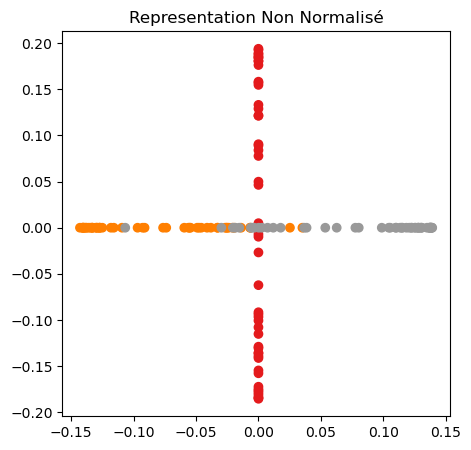

In [39]:
fig,ax = plt.subplots(figsize=(5,5))
plt.scatter(YL[:,2],YL[:,3], c = y[0:N],cmap = plt.cm.Set1)
plt.title("Representation Non Normalisé")

#  visualiza o segundo e o terceiro valor propre (sao os valpropres nao nulos)

Val propres Laplacian non  normalisé =   [-2.16693707e-16 -9.72505858e-17  4.88099399e-02  1.74839728e-01
  2.15000610e-01  4.52769625e-01  5.48614855e-01  6.63974012e-01
  7.24036946e-01  7.41146306e-01  8.18308019e-01  8.24914243e-01
  8.40778904e-01  8.75354177e-01  8.75585543e-01  8.98597737e-01
  9.00116914e-01  9.01706732e-01  9.10817750e-01  9.15693454e-01]


Text(0.5, 1.0, 'Representation Normalisé (20 voisins)')

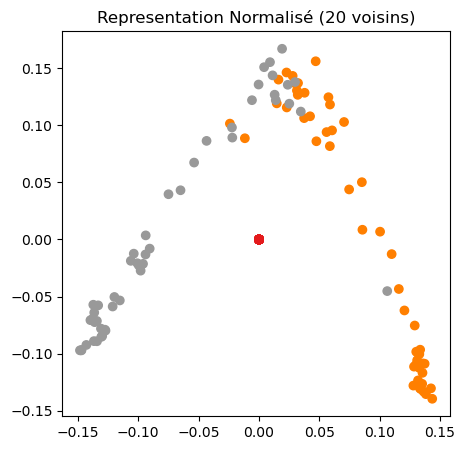

In [45]:
# Si on normalise le laplacian
Dinv = linalg.inv(D)
Dinv = Dinv.sqrt()
NormLaplacian  =  Dinv @ Laplacian @ Dinv

[yln, YLn] = linalg.eigsh(NormLaplacian, n_neighbors, which='SM')
print("Val propres Laplacian non  normalisé =  ", yln)

fig,ax = plt.subplots(figsize=(5,5))
plt.scatter(YLn[:,2],YLn[:,3], c = y[0:N],cmap = plt.cm.Set1)
plt.title("Representation Normalisé (20 voisins)")

# on garde une varience - é importante que eles se separem e aproveirem  o espaço
# a menos que seja em apenas um ponto

# Quando usamos os valeur propres non nules, o resultado é proximo ao do ScikitLearn



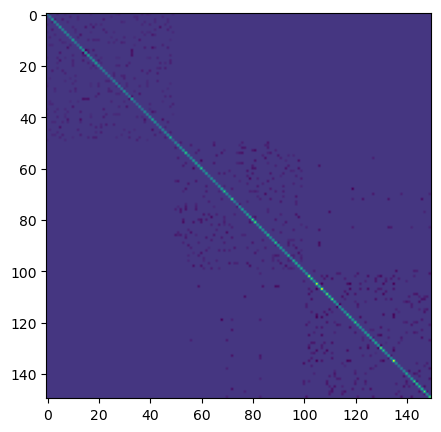

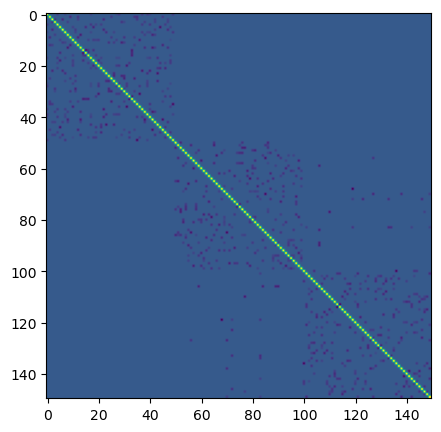

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(Laplacian.todense())

plt.figure(figsize=(5,5))
plt.imshow(NormLaplacian.todense())

# visualizando as duas normalizadas parecem ser a mesma coisa para o IRIS
# pode ser diferente em outro dataset
# ou podemos colocar a legenda para ter certeza

**Comparer à scikitlearn**

c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


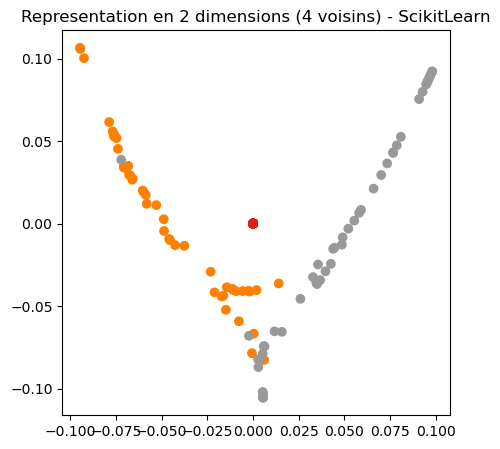

In [9]:
C = y[0:N].astype(float)

# X_iso = manifold.SpectralEmbedding(n_neighbors = n_neighbors , n_components = 2).fit_transform(X)
X_iso = manifold.SpectralEmbedding(n_neighbors = n_neighbors , n_components = 3, affinity='nearest_neighbors',random_state=0,eigen_solver="arpack").fit_transform(X)
fig,ax = plt.subplots(figsize=(5,5))
scatter = ax.scatter(X_iso[:,1],X_iso[:,2], c = C,cmap = plt.cm.Set1)
plt.title("Representation en 2 dimensions ({} voisins) - ScikitLearn".format(n_neighbors))
# legend1 = ax.legend(*scatter.legend_elements(),loc = "upper right",title= "nuage de points")
# ax.add_artist(legend1)
plt.show()

# Encontramos o mesmo resultado do nao normalizado (estranho, apenas no caso  da linha)

# O metodo funcionou bem
# Separou bem a classe vermelha, e as outras duas estao mais separadas

# sensiblement la meme chose (l'arc plus acentué)

#### Digit

In [47]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

N = X.shape[0]

In [48]:
n_neighbors = 10 # Aumentar o valor de K nao impacta muito o resultado. A distribuicao segue com mesma geometria, mas um pouco mais acentuado
kng = kneighbors_graph(X, n_neighbors,mode='distance')
kng.nnz

# simetrizar (pode aumentar o numero de vizinhos para k+(k-1))
W = 0.5*(kng+kng.T)  

# plt.figure(figsize=(5,5))
# #plt.imshow(kng.todense())
# plt.imshow(kng.todense()[:50,:50])


# plt.figure(figsize=(5,5))
# plt.imshow(W.todense())

Val propres Laplacian non  normalisé =   [4.54467303e-19 6.01575923e-01 1.29343379e+00 1.64804286e+00
 1.89803474e+00 2.71879606e+00 2.77010824e+00 4.14040718e+00
 4.54632422e+00 7.21045344e+00]


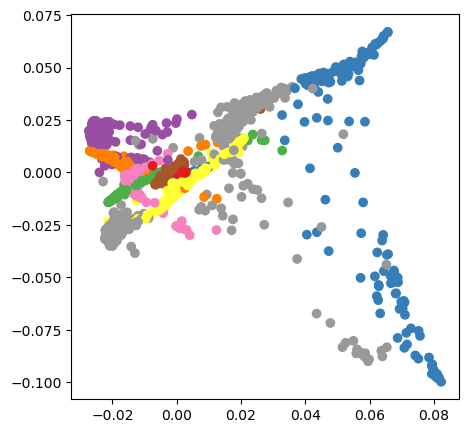

In [49]:
# matriz de degree ou matrice de adjacences (soma dos valores das colunas)
D = diags(np.asarray(W.sum(axis=0)).flatten())

Laplacian = D-W

[yl, YL] = linalg.eigsh(Laplacian, n_neighbors, which='SM')
print("Val propres Laplacian non  normalisé =  ", yl)

# percebe-se dois valpropres "nulos" 

fig,ax = plt.subplots(figsize=(5,5))
scatter = ax.scatter(YL[:,8],YL[:,9], c = y[0:N],cmap = plt.cm.Set1)

#  visualiza o segundo e o terceiro valor propre (sao os valpropres nao nulos)

Val propres Laplacian non  normalisé =   [-1.15058479e-16  3.33082468e-03  6.88577550e-03  8.16461534e-03
  9.25354379e-03  1.27700406e-02  1.34366021e-02  1.89346810e-02
  2.20049760e-02  3.39199988e-02]


Text(0.5, 1.0, 'Representation Digits')

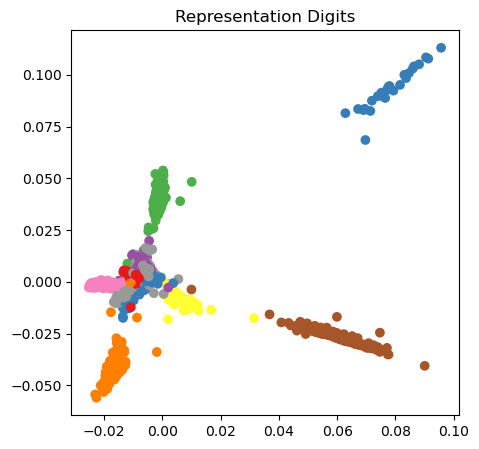

In [51]:
# Si on normalise le laplacian
Dinv = linalg.inv(D)
Dinv = Dinv.sqrt()
NormLaplacian  =  Dinv @ Laplacian @ Dinv

[yln, YLn] = linalg.eigsh(NormLaplacian, n_neighbors, which='SM')
print("Val propres Laplacian non  normalisé =  ", yln)

fig,ax = plt.subplots(figsize=(5,5))
plt.scatter(YLn[:,2],YLn[:,3], c = y[0:N],cmap = plt.cm.Set1)
plt.title("Representation Digits")

# on garde une varience - é importante que eles se separem e aproveirem  o espaço
# a menos que seja em apenas um ponto

# Quando usamos os valeur propres non nules, o resultado é proximo ao do ScikitLearn

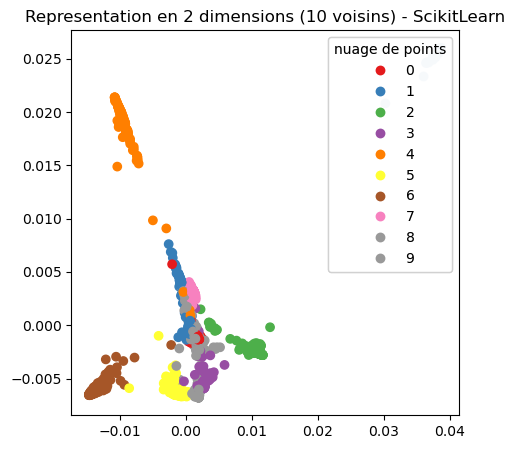

In [52]:
C = y[0:N].astype(float)

# X_iso = manifold.SpectralEmbedding(n_neighbors = n_neighbors , n_components = 2).fit_transform(X)
X_iso = manifold.SpectralEmbedding(n_neighbors = n_neighbors , n_components = 4, affinity='nearest_neighbors',random_state=0,eigen_solver="arpack").fit_transform(X)
fig,ax = plt.subplots(figsize=(5,5))
scatter = ax.scatter(X_iso[:,2],X_iso[:,3], c = C,cmap = plt.cm.Set1)
plt.title("Representation en 2 dimensions ({} voisins) - ScikitLearn".format(n_neighbors))
legend1 = ax.legend(*scatter.legend_elements(),loc = "upper right",title= "nuage de points")
ax.add_artist(legend1)
plt.show()

# Encontramos o mesmo resultado do nao normalizado (estranho, apenas no caso  da linha)

# O metodo funcionou bem
# Separou bem a classe vermelha, e as outras duas estao mais separadas

# sensiblement la meme chose (l'arc plus acentué)